# Lecture: Statistical Modeling of Clustered Data
<img src="images/complexcarelab.png" alt="Complex Care Lab" style="width: 200px;"/>

## Diego Pinheiro, Ph.D. 
## Lecture Notes on Network Medicine, 



## Outline:
1. Background
 1. Covariance and Correlation
 2. Clustered and Longitudinal Data 
2. Statistical Tests
 * Two-Sample Unpaired t Test
 * One-Sample Paired t Test
 * Clustered Data and Standard Errors
3. Statistical Modeling
 * Generalized Linear Models (GLM), 
 * Generalized Linear Mixed Models (GLMM), and 
 * Generalized Estimating Equations (GEE)
 * Bayesian Hierarchical Modeling (BHM)

### Learning Objectives 
1. Describe the difference between covariance and correlation;
2. Calculate the correlation between two variables; 
3. Identify potential sources of correlation in data;
4. Discriminate between paired and unpaired statistical analysis;
5. Explain why correlation affects statistical power 

### References
1. Devore, J. L. (2011). Probability and Statistics for Engineering and the Sciences (9 ed.). Boston, MA: Cengage learning.
2. Fitzmaurice, G. M., Laird, N. M., & Ware, J. H. (2004). Applied Longitudinal Analysis (pp. 1–716). Hoboken, N.J: Wiley-Interscience.
3. Dobson, A. J., & Barnett, A. G. (2008). An Introduction to Generalized Linear Models (pp. 1–316).  Boca Raton: Chapman & Hall/CRC.

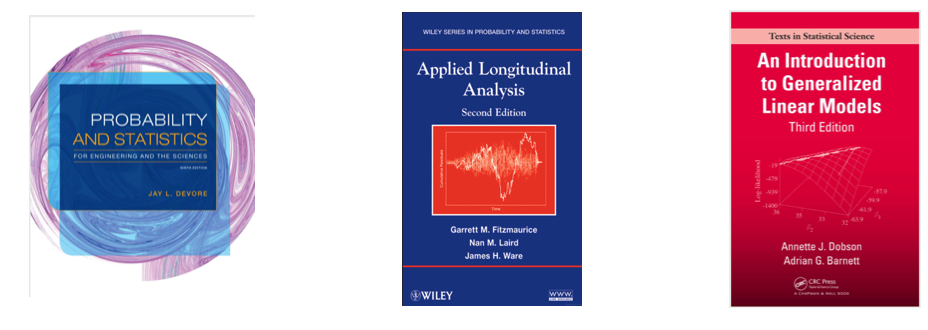

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
        'size'   : 22}
plt.rc('font', **font)

## Working Example  <a class="anchor" id="working-example"></a>
Data obtained of Example 9.8 from Devore [1]
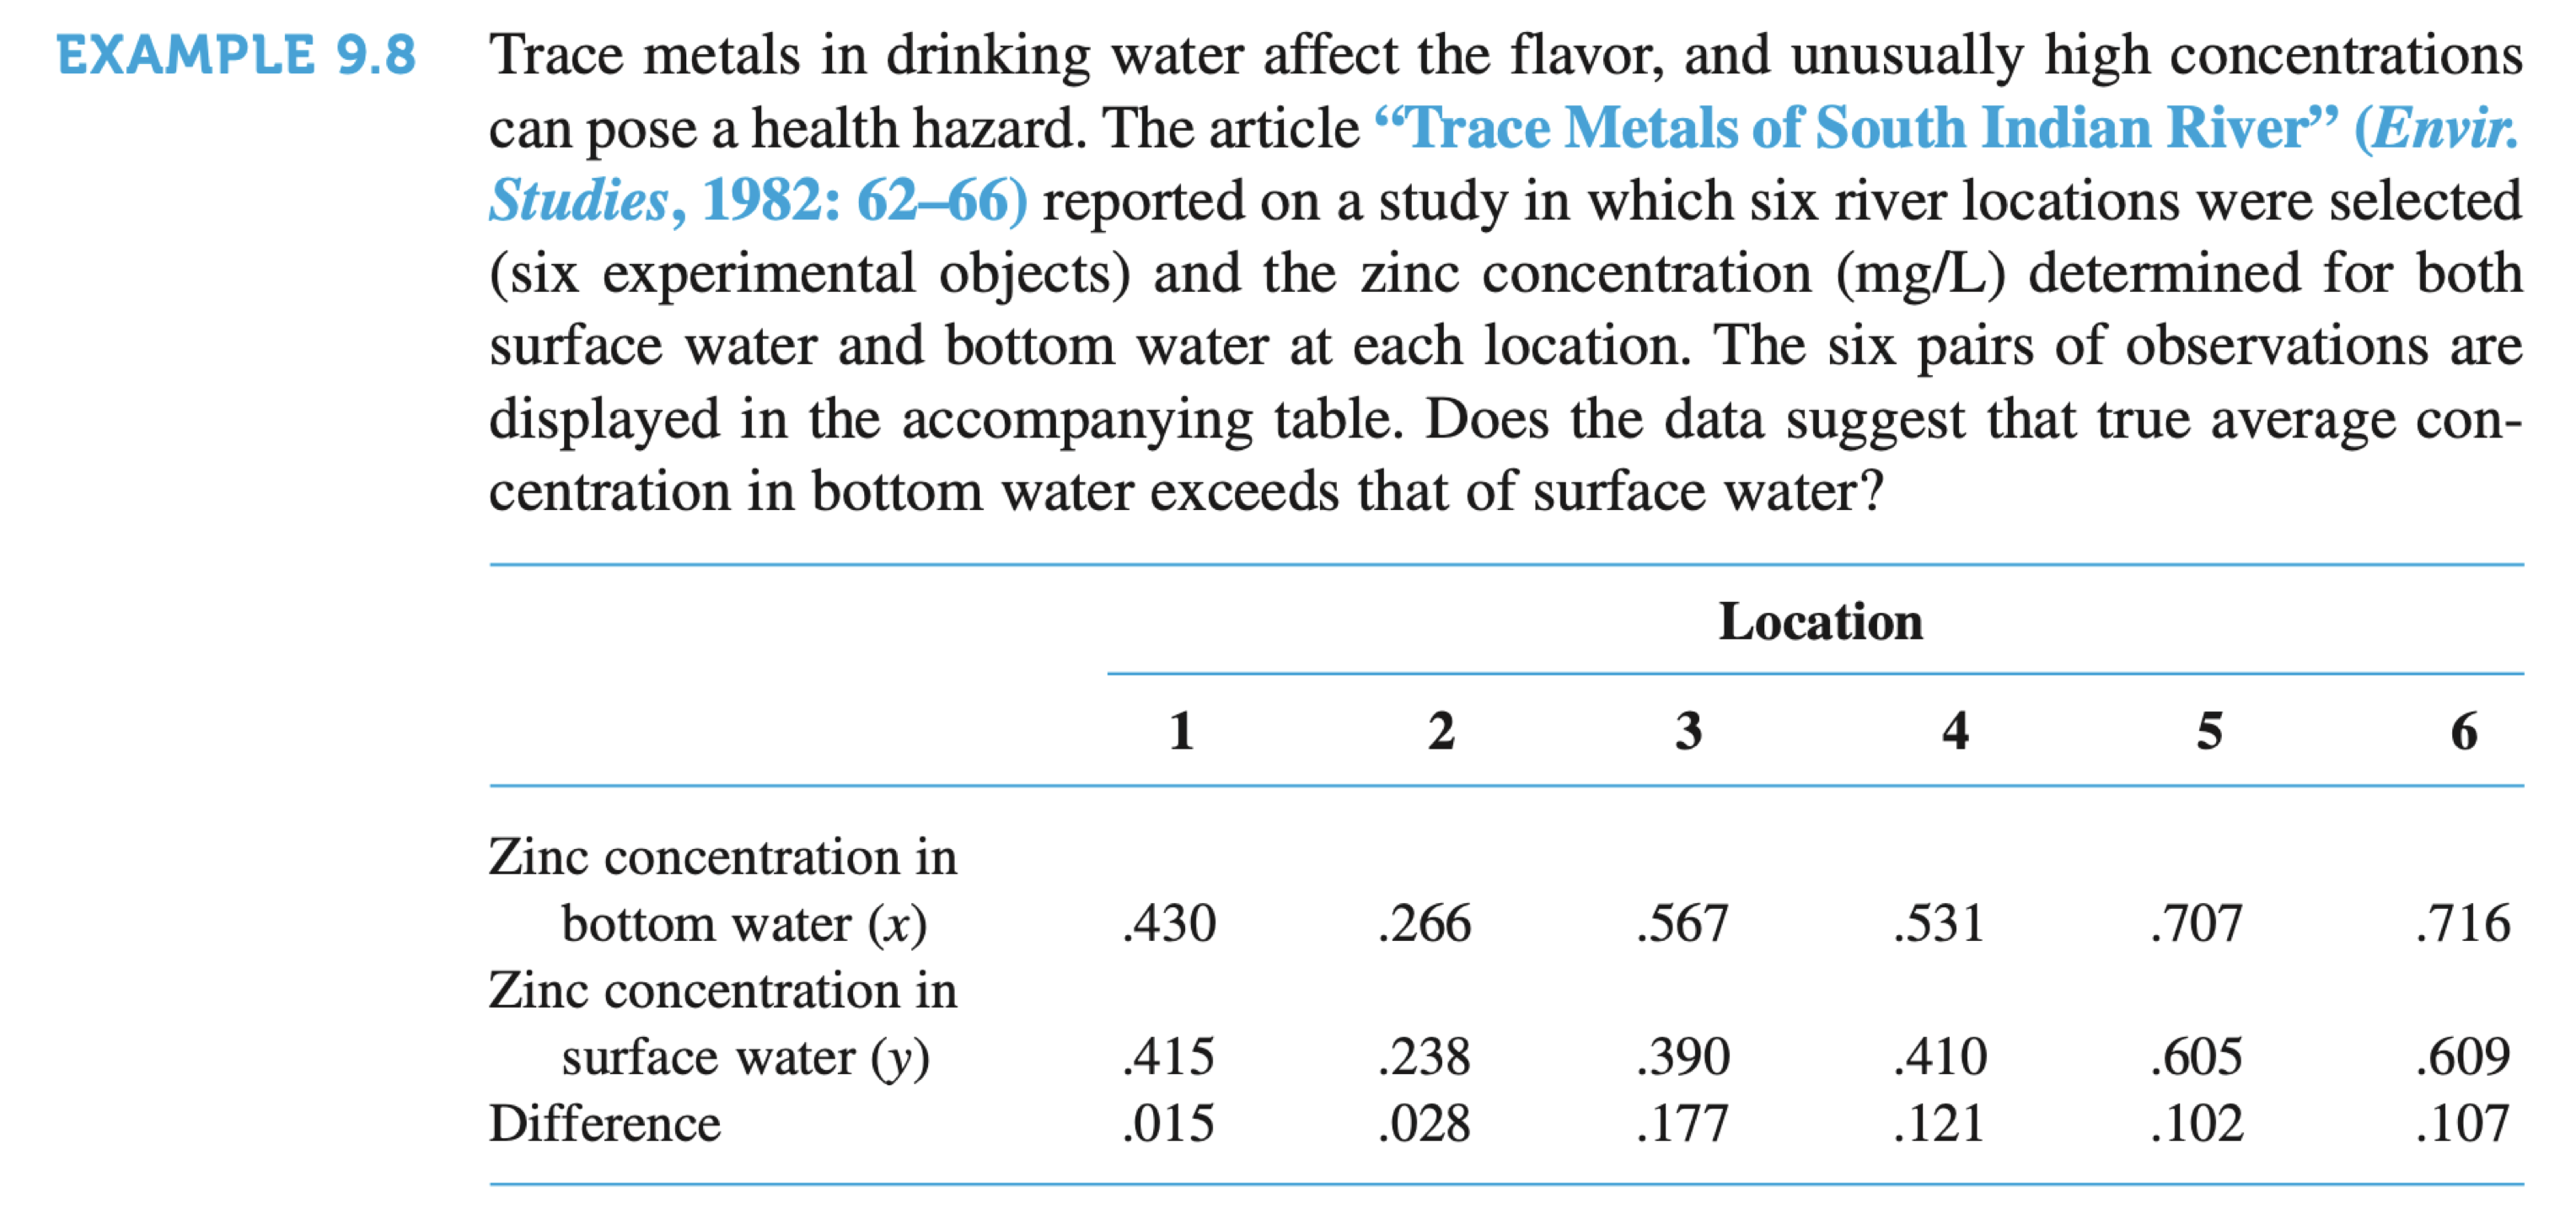



In [5]:
df_zinc_concentration = pd.DataFrame(
    {
        'location': range(1,7),
        'bottom': [.430, .266, .567, .531, .707, .716], 
        'surface': [.415, .238, .390, .410, .605, .609]
    }
)

In [6]:
df_zinc_concentration.head(10)

,location,bottom,surface
0,1,0.430,0.415
1,2,0.266,0.238
2,3,0.567,0.390
3,4,0.531,0.410
4,5,0.707,0.605
5,6,0.716,0.609


In [7]:
df_zinc_concentration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  6 non-null      int64  
 1   bottom    6 non-null      float64
 2   surface   6 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 272.0 bytes


In [8]:
df_zinc_concentration[['bottom', 'surface']].mean()

bottom     0.536167
surface    0.444500
dtype: float64

In [9]:
df_zinc_concentration[['bottom', 'surface']].std()

bottom     0.171326
surface    0.141770
dtype: float64

In [10]:
df_zinc_concentration.describe()

,location,bottom,surface
count,6.000000,6.000000,6.00000
mean,3.500000,0.536167,0.44450
std,1.870829,0.171326,0.14177
min,1.000000,0.266000,0.23800
25%,2.250000,0.455250,0.39500
50%,3.500000,0.549000,0.41250
75%,4.750000,0.672000,0.55750
max,6.000000,0.716000,0.60900


## Two-Sample Unpaired t Test


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


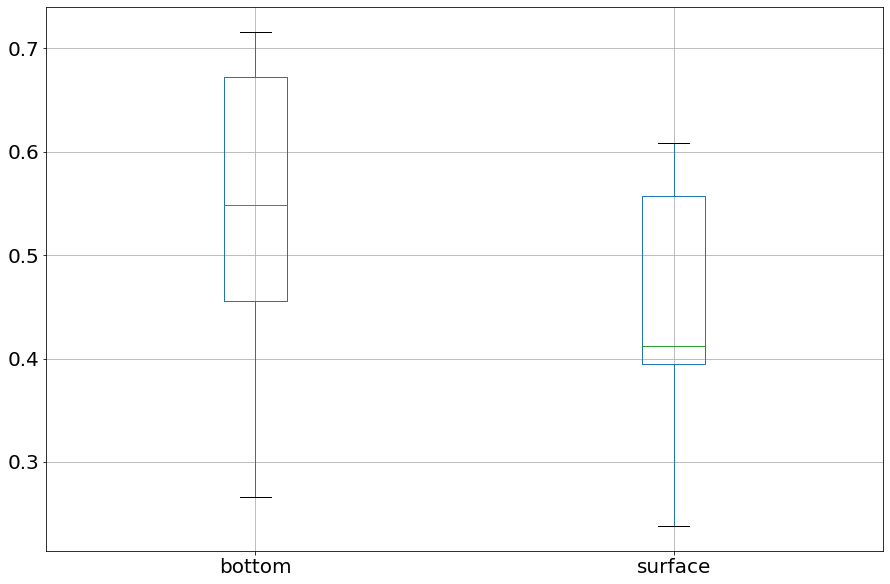

In [11]:
df_zinc_concentration[['bottom', 'surface']].boxplot()

In [12]:
df_zinc_concentration_melted = df_zinc_concentration.melt(id_vars='location', value_vars=['bottom', 'surface'])
df_zinc_concentration_melted

,location,variable,value
0,1,bottom,0.430
1,2,bottom,0.266
2,3,bottom,0.567
3,4,bottom,0.531
4,5,bottom,0.707
5,6,bottom,0.716
6,1,surface,0.415
7,2,surface,0.238
8,3,surface,0.390
9,4,surface,0.410


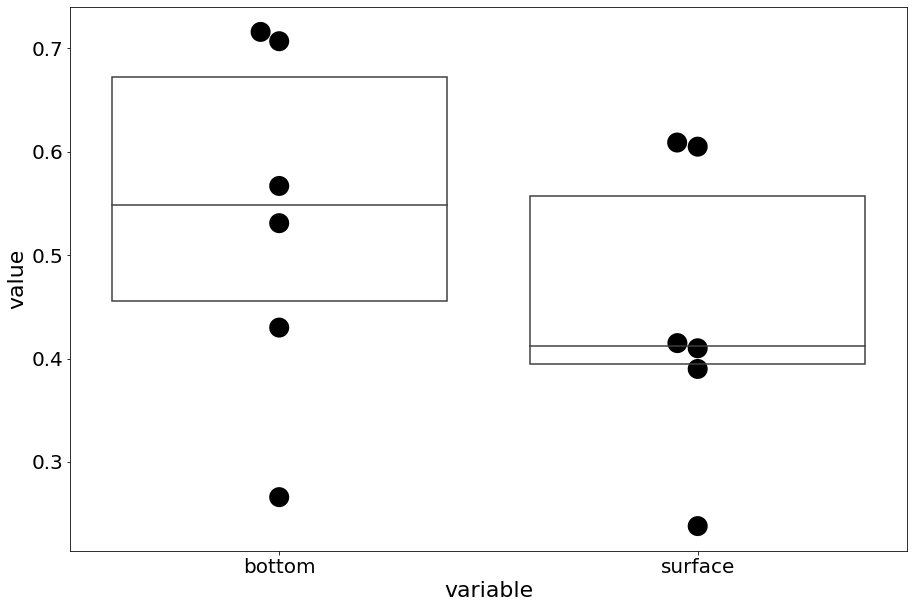

In [171]:
ax = sns.swarmplot(x='variable', y='value',  data=df_zinc_concentration_melted, color='black', s=20)
sns.boxplot(x='variable', y='value', data=df_zinc_concentration_melted,
                     showcaps=False, boxprops={'facecolor': 'None', "zorder": 10},
                     showfliers=False, whiskerprops={'linewidth': 0, "zorder": 10},
                     ax=ax, zorder=10)

In [14]:
import scipy.stats as st
st.ttest_ind(a=df_zinc_concentration['bottom'], b=df_zinc_concentration['surface'])

Ttest_indResult(statistic=1.0097139447330616, pvalue=0.33643940903529834)

## Clustered Data

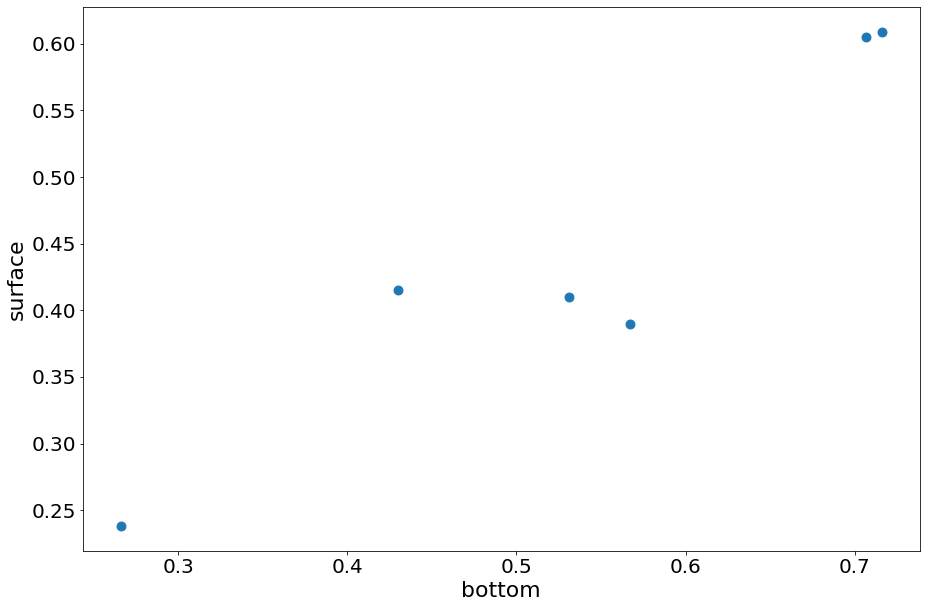

In [15]:
df_zinc_concentration.plot(x='bottom', y='surface', kind='scatter', s=80)

In [16]:
df_zinc_concentration.corr()

,location,bottom,surface
location,1.000000,0.847681,0.788381
bottom,0.847681,1.000000,0.942165
surface,0.788381,0.942165,1.000000


## One-Sample Paired t Test

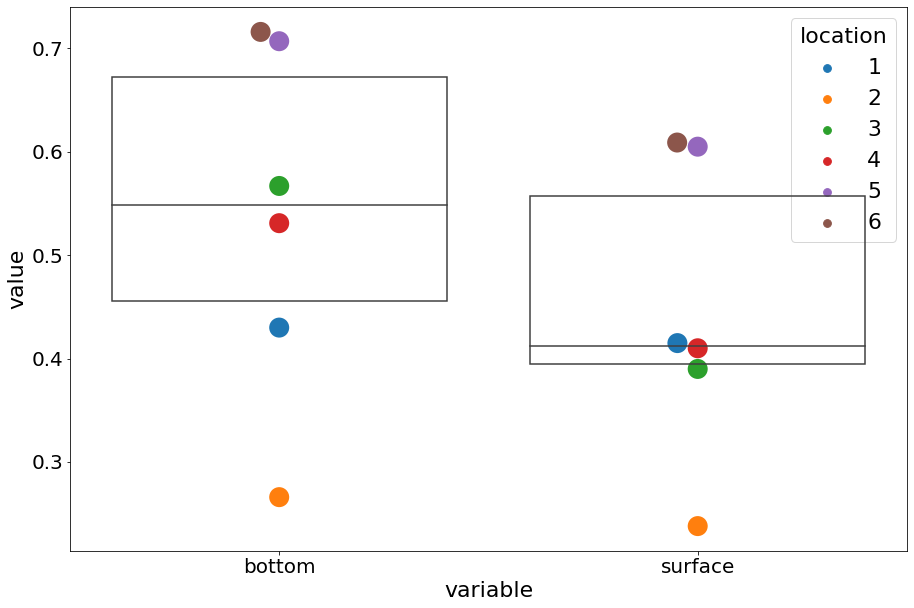

In [17]:
ax = sns.swarmplot(x='variable', y='value',  data=df_zinc_concentration_melted, hue='location', s=20)
sns.boxplot(x='variable', y='value', data=df_zinc_concentration_melted,
                     showcaps=False, boxprops={'facecolor': 'None', "zorder": 10},
                     showfliers=False, whiskerprops={'linewidth': 0, "zorder": 10},
                     ax=ax, zorder=10)

In [18]:
df_zinc_concentration['difference_bottom_surface'] = df_zinc_concentration['bottom'] - df_zinc_concentration['surface']

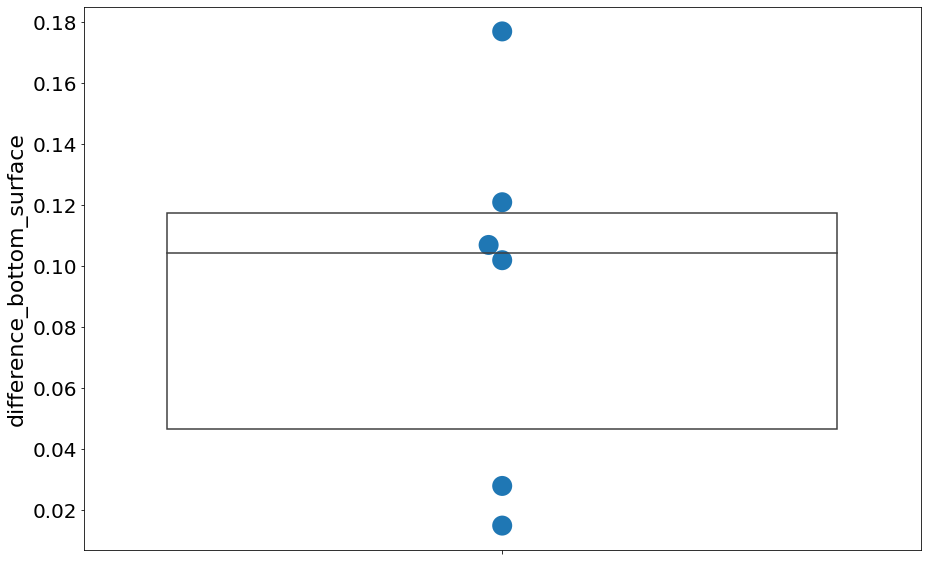

In [19]:
ax = sns.swarmplot(y='difference_bottom_surface',  data=df_zinc_concentration, hue_order='location', s=20)
sns.boxplot(y='difference_bottom_surface', data=df_zinc_concentration,
                     showcaps=False, boxprops={'facecolor': 'None', "zorder": 10},
                     showfliers=False, whiskerprops={'linewidth': 0, "zorder": 10},
                     ax=ax, zorder=10)

## Clustered Data and Standard Errors

In [79]:
df_zinc_concentration[['bottom', 'surface']].corr()

,bottom,surface
bottom,1.000000,0.942165
surface,0.942165,1.000000


In [84]:
print(df_zinc_concentration[['bottom', 'surface']].corr().to_latex())

\begin{tabular}{lrr}
\toprule
{} &    bottom &   surface \\
\midrule
bottom  &  1.000000 &  0.942165 \\
surface &  0.942165 &  1.000000 \\
\bottomrule
\end{tabular}



In [69]:
df_zinc_concentration[['bottom', 'surface']].cov()

,bottom,surface
bottom,0.029353,0.022884
surface,0.022884,0.020099


In [67]:
print(df_zinc_concentration[['bottom', 'surface']].cov().to_latex())

\begin{tabular}{lrr}
\toprule
{} &    bottom &   surface \\
\midrule
bottom  &  0.029353 &  0.022884 \\
surface &  0.022884 &  0.020099 \\
\bottomrule
\end{tabular}



In [196]:
var_bottom = df_zinc_concentration.cov()['bottom']['bottom']
var_surface = df_zinc_concentration.cov()['surface']['surface']
cov_surface_bottom = df_zinc_concentration.cov()['surface']['bottom']

### Error independent modeling

In [193]:
std_error_independent = np.sqrt(var_bottom/n + var_surface /n )
std_error_independent

0.09078478825099377

### Error Clustered Modeling 

In [200]:
std_error_dependent = np.sqrt(var_bottom/n + var_surface /n - 2*cov_surface_bottom/ n)
std_error_dependent

0.024775884332238145

In [201]:
std_error_independent / std_error_dependent 

3.6642400744850696

# Statistical Modeling

## Generalized Linear Models (GLM)

In [172]:
import statsmodels.formula.api as smf
model = smf.ols(formula='value ~ C(variable, Treatment(reference="surface"))', data=df_zinc_concentration_melted)
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  value   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.020
Date:                Mon, 13 Jul 2020   Prob (F-statistic):              0.336
Time:                        04:41:04   Log-Likelihood:                 6.2662
No. Observations:                  12   AIC:                            -8.532
Df Residuals:                      10   BIC:                            -7.562
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:1534: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Generalized Linear Mixed Models (GLMM), and 

                            Mixed Linear Model Regression Results
Model:                          MixedLM               Dependent Variable:               value 
No. Observations:               12                    Method:                           REML  
No. Groups:                     6                     Scale:                            0.0018
Min. group size:                2                     Log-Likelihood:                   7.3735
Max. group size:                2                     Converged:                        Yes   
Mean group size:                2.0                                                           
----------------------------------------------------------------------------------------------
                                                      Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                             0.445    0.064 6.924 0.00

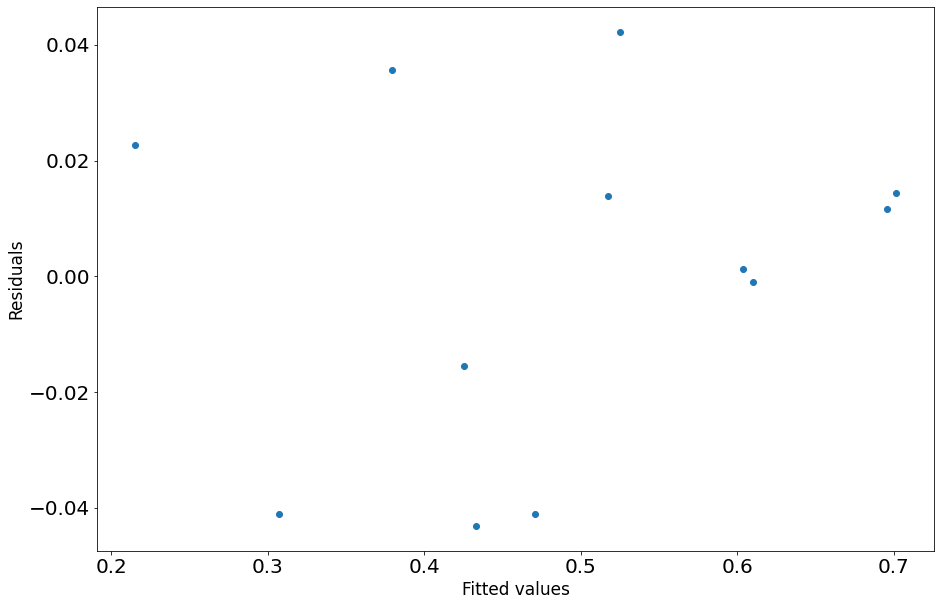

In [152]:
import statsmodels.formula.api as smf

model = smf.mixedlm(formula='value ~ C(variable, Treatment(reference="surface"))', data=df_zinc_concentration_melted, groups=df_zinc_concentration_melted['location'])
model = model.fit()
print(model.summary())

fig, ax = plt.subplots()
plt.plot(model.fittedvalues, model.resid, 'o', alpha=1)
plt.xlabel("Fitted values", size=17)
plt.ylabel("Residuals", size=17)
plt.show()


## Generalized Estimating Equations (GEE)


In [153]:
from statsmodels.genmod.cov_struct import Exchangeable, Independence, Autoregressive, CovStruct, Nested
from statsmodels.genmod.families import Gaussian, Binomial, NegativeBinomial

cov_struct = Exchangeable()
fam = Gaussian()
model = smf.gee(formula='value ~ C(variable, Treatment(reference="surface"))', groups=df_zinc_concentration_melted['location'], data=df_zinc_concentration_melted)
model = model.fit()
print(model.summary())



                               GEE Regression Results                              
Dep. Variable:                       value   No. Observations:                   12
Model:                                 GEE   No. clusters:                        6
Method:                        Generalized   Min. cluster size:                   2
                      Estimating Equations   Max. cluster size:                   2
Family:                           Gaussian   Mean cluster size:                 2.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Sun, 12 Jul 2020   Scale:                           0.025
Covariance type:                    robust   Time:                         11:17:01
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------


## Bayesian Hierarchical Modeling (BHM)

In [167]:

import pymc3 as pm

group_ids = [i-1 for i in df_zinc_concentration_melted['location'].values]
treatments = df_zinc_concentration_melted['variable'].apply(lambda x: 1 if x == 'bottom' else 0)

n_groups = len(np.unique(group_ids))

with pm.Model() as hierarchical_model:
    mu_intercept = pm.Normal('mu_intercept', mu=0, sigma=1)
    sigma_intercept = pm.HalfNormal('sigma_intercept', 5.)
    mu_surface = pm.Normal('mu_surface', mu=0., sigma=1)
    sigma_bottom = pm.HalfNormal('sigma_bottom', 5.)

    intercept = pm.Normal('intercept', mu=mu_intercept, sigma=sigma_intercept, shape=n_groups)

    eps = pm.HalfCauchy('eps', 5.)

    est = mu_intercept + intercept[group_ids] + mu_surface*treatments
    
    like = pm.Normal('like', mu=est, sigma=eps, observed=df_zinc_concentration_melted['value'].values)

    hierarchical_trace = pm.sample()
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, intercept, sigma_bottom, mu_surface, sigma_intercept, mu_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


/home/jovyan/.local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ac00ea310>,
      dtype=object)

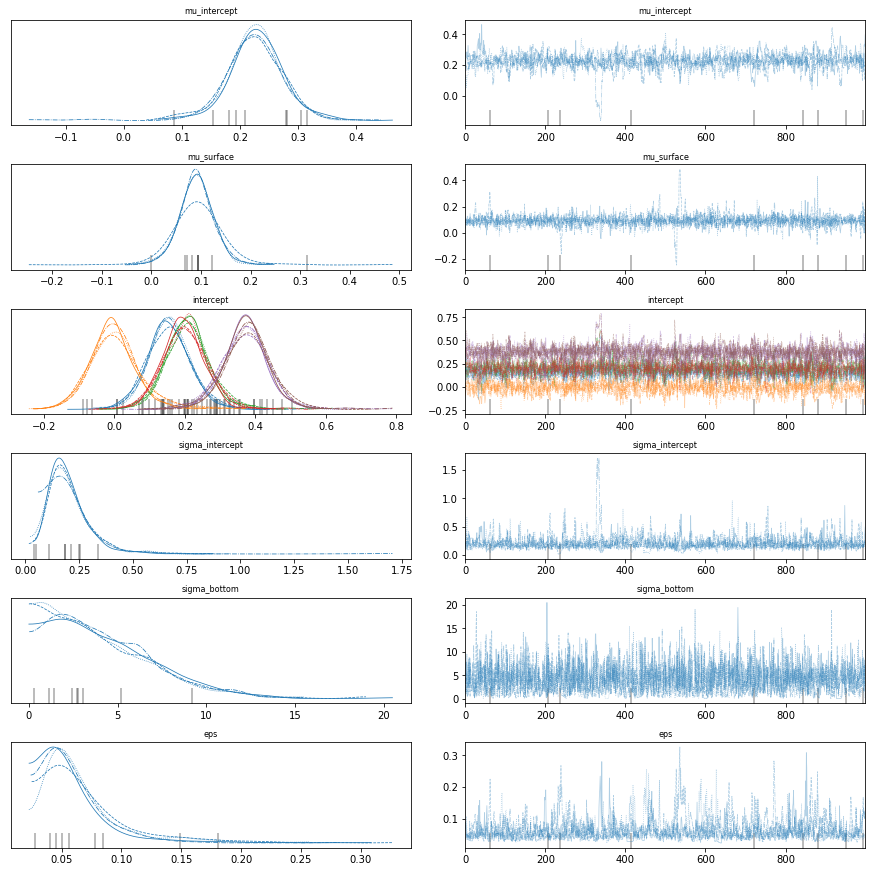

In [168]:
pm.traceplot(hierarchical_trace)

In [169]:
pm.summary(hierarchical_trace)

/home/jovyan/.local/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu_intercept,0.225,0.050,0.144,0.325,0.002,0.001,611.0,611.0,788.0,815.0,1.00
mu_surface,0.092,0.041,0.019,0.161,0.001,0.001,1770.0,911.0,2349.0,1555.0,1.01
intercept[0],0.157,0.063,0.040,0.274,0.002,0.002,862.0,621.0,1011.0,1062.0,1.00
intercept[1],0.002,0.073,-0.125,0.146,0.003,0.002,629.0,495.0,769.0,571.0,1.00
intercept[2],0.208,0.064,0.092,0.329,0.002,0.002,874.0,655.0,1057.0,1127.0,1.00
intercept[3],0.200,0.064,0.082,0.314,0.002,0.002,909.0,670.0,1078.0,1210.0,1.00
intercept[4],0.370,0.068,0.245,0.496,0.002,0.002,816.0,702.0,932.0,1001.0,1.00
intercept[5],0.376,0.068,0.252,0.501,0.002,0.002,812.0,717.0,939.0,1078.0,1.00
sigma_intercept,0.204,0.114,0.069,0.399,0.004,0.004,741.0,520.0,1090.0,644.0,1.00
sigma_bottom,4.024,2.964,0.005,9.260,0.063,0.045,2210.0,2210.0,1422.0,1011.0,1.00


## Why is that ?

In [36]:
var_bottom = df_zinc_concentration.var()['bottom']
var_surface = df_zinc_concentration.var()['surface']
var_difference_bottom_surface = df_zinc_concentration.var()['difference_bottom_surface']

In [37]:
var_bottom

0.029352566666666656

In [38]:
var_surface

0.020098699999999997

In [60]:
2*np.sqrt(var_bottom)*np.sqrt(var_surface)

0.04857770812474928

In [61]:
covar_bottom_surface = df_zinc_concentration.cov()['bottom']['surface']
2 * covar_bottom_surface

0.045768199999999995

In [62]:
n = df_zinc_concentration.shape[0]
n

6

0.09078478825099377

0.024775829253906066

3.664248220336802

In [90]:
corr_bottom_surface = df_zinc_concentration.corr()['bottom']['surface']
corr_bottom_surface

0.9421646629039317

In [120]:
covar_bottom_surface_2 = corr_bottom_surface * np.sqrt(var_bottom) * np.sqrt(var_surface)
covar_bottom_surface_2

0.022884099999999994

In [121]:
covar_bottom_surface == covar_bottom_surface_2

False

In [122]:
np.round(covar_bottom_surface, 18)

0.022884099999999997

In [123]:
np.round(covar_bottom_surface_2, 18)

0.022884099999999997

In [124]:
np.round(covar_bottom_surface, 18) == np.round(covar_bottom_surface_2, 18)

True

## References